### Import libraries and load env variables

In [127]:
import os

import pandas as pd
import matplotlib.pyplot as plt

from dotenv import load_dotenv

load_dotenv()

True

### Load data

In [128]:
# Define paths
# fpath_data = os.environ["FPATH_DATA"]
fpath_data = os.environ.get("FPATH_DATA")
fpath_dicts = os.environ.get("FPATH_DICTS")

# Load order items data
order_items = pd.read_csv(fpath_data+"order_items.csv")

# Show sample data
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [129]:
# Inspect order_items data
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [130]:
# No nulls in the df
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [131]:
# Check datatypes
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [132]:
# Convert shipping_limit_date to timestamps
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [133]:
# Lets load data regarding product category, drop redundant columns, check the data, and then join the data to order_items
product_categories = pd.read_csv(fpath_data+"products.csv")
product_categories = product_categories[["product_id", "product_category_name"]]

# Turns out 610 product id's doesnt have any category at all, I drop those rows
product_categories['product_category_name'].isnull().sum()

610

In [134]:
# Drop nulls
product_categories = product_categories.dropna()
# Double check for nulls
product_categories.isnull().sum()

product_id               0
product_category_name    0
dtype: int64

In [135]:
# Map categories to english ones
categories_translation_data = pd.read_csv(fpath_data+"product_category_name_translation.csv")
categories_translation_data.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [136]:
product_categories = pd.merge(product_categories, categories_translation_data, how='left', on='product_category_name')
product_categories.isnull().sum()

product_id                        0
product_category_name             0
product_category_name_english    13
dtype: int64

In [137]:
# Instead of dropping 13 rows w/o translation, use the same data as originally
# product_categories[product_categories['product_category_name_english'].isnull()] # prior df check
product_categories['product_category_name_english'] = product_categories['product_category_name_english'].fillna(product_categories['product_category_name'])

In [138]:
# Join product category to orders
order_items = pd.merge(order_items, product_categories, how='left', on='product_id')
order_items_with_categories_shape = order_items.shape
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,computers_accessories


In [139]:
# Check again for null products after the join - turns out 1603 are without a category
order_items.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_category_name_english    1603
dtype: int64

In [140]:
# I decided to drop those without any category prescribed as those might be incorrect data
order_items = order_items.dropna(subset=['product_category_name'])

In [141]:
# Join data regarding purchase timestamp - first, read data
orders = pd.read_csv(fpath_data+'orders.csv')
# Keep only relevant columns
orders = orders[['order_id','order_purchase_timestamp']]
# Check for nulls
orders.isnull().sum()
# Transform order_purchase_timestamp to a timestamp object
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [142]:
# Join orders data via inner - we could do also left join, but it would need to double check for nulls
order_items = pd.merge(order_items, orders, how='inner', on='order_id')

print(f'After the join we lost {order_items_with_categories_shape[0] - order_items.shape[0]} rows due to lact of information about the purchase timestamp')

After the join we lost 0 rows due to lact of information about the purchase timestamp


In [143]:
# Drop redundant data, not related to this task
# As this is just a demonstration, we won't be adding information such as holidays for a different set of countries the customers are from etc
order_items = order_items.drop(columns=['seller_id','freight_value','shipping_limit_date','product_category_name'])

In [117]:
# As I understand correctly per obtained dict, ['price'] is 'item price'
# and ['order_item_id'] is 'sequential number identifying number of items included in the same order.'.
# Therefore, total sales value is as follows: ['Total Sales'] = ['price'] * ['order_item_id']
order_items['total_sales'] = order_items['price'] * order_items['order_item_id']

In [118]:
# Add a set of information regarding sale timestamp
order_items['Purchase Date'] = order_items['order_purchase_timestamp'].dt.to_period('D')
order_items['Purchase Year-Month'] = order_items['order_purchase_timestamp'].dt.to_period('M')
order_items['Purchase Year'] = order_items['order_purchase_timestamp'].dt.to_period('Y')
order_items['Purchase Month'] = order_items['order_purchase_timestamp'].dt.month
order_items['Purchase Day Name'] = order_items['order_purchase_timestamp'].dt.day_name()
order_items['Purchase Day'] = order_items['order_purchase_timestamp'].dt.day
order_items['Purchase Week of Year'] = order_items['order_purchase_timestamp'].dt.isocalendar().week

order_items

,order_id,order_item_id,product_id,price,product_category_name_english,order_purchase_timestamp,total_sales,Purchase Date,Purchase Year-Month,Purchase Year,Purchase Month,Purchase Day Name,Purchase Day,Purchase Week of Year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,2017-09-13 08:59:02,58.90,2017-09-13,2017-09,2017,9,Wednesday,13,37
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,2017-04-26 10:53:06,239.90,2017-04-26,2017-04,2017,4,Wednesday,26,17
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,furniture_decor,2018-01-14 14:33:31,199.00,2018-01-14,2018-01,2018,1,Sunday,14,2
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfumery,2018-08-08 10:00:35,12.99,2018-08-08,2018-08,2018,8,Wednesday,8,32
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,garden_tools,2017-02-04 13:57:51,199.90,2017-02-04,2017-02,2017,2,Saturday,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,housewares,2018-04-23 13:57:06,299.99,2018-04-23,2018-04,2018,4,Monday,23,17
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,computers_accessories,2018-07-14 10:26:46,350.00,2018-07-14,2018-07,2018,7,Saturday,14,28
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,sports_leisure,2017-10-23 17:07:56,99.90,2017-10-23,2017-10,2017,10,Monday,23,43
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,computers_accessories,2017-08-14 23:02:59,55.99,2017-08-14,2017-08,2017,8,Monday,14,33


### Basic EDA

In [119]:
# What is the shape of our data?
order_items.shape

(112650, 14)

In [120]:
# How many categories of products are out there?
order_items['product_category_name_english'].nunique()

73

In [121]:
order_items.describe()

,order_item_id,price,order_purchase_timestamp,total_sales,Purchase Month,Purchase Day,Purchase Week of Year
count,112650.000000,112650.000000,112650,112650.000000,112650.000000,112650.000000,112650.0
mean,1.197834,120.653739,2018-01-01 00:09:48.464376576,136.686539,6.026835,15.558331,24.338686
min,1.000000,0.850000,2016-09-04 21:15:19,0.850000,1.000000,1.000000,1.0
25%,1.000000,39.900000,2017-09-13 19:17:04,45.000000,3.000000,8.000000,13.0
50%,1.000000,74.990000,2018-01-19 23:02:16,84.495000,6.000000,16.000000,23.0
75%,1.000000,134.900000,2018-05-04 17:30:36.750000128,149.900000,8.000000,23.000000,34.0
max,21.000000,6735.000000,2018-09-03 09:06:57,13440.000000,12.000000,31.000000,52.0
std,0.705124,183.633928,NaN,217.468683,3.232541,8.664745,14.056993


In [122]:
order_items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

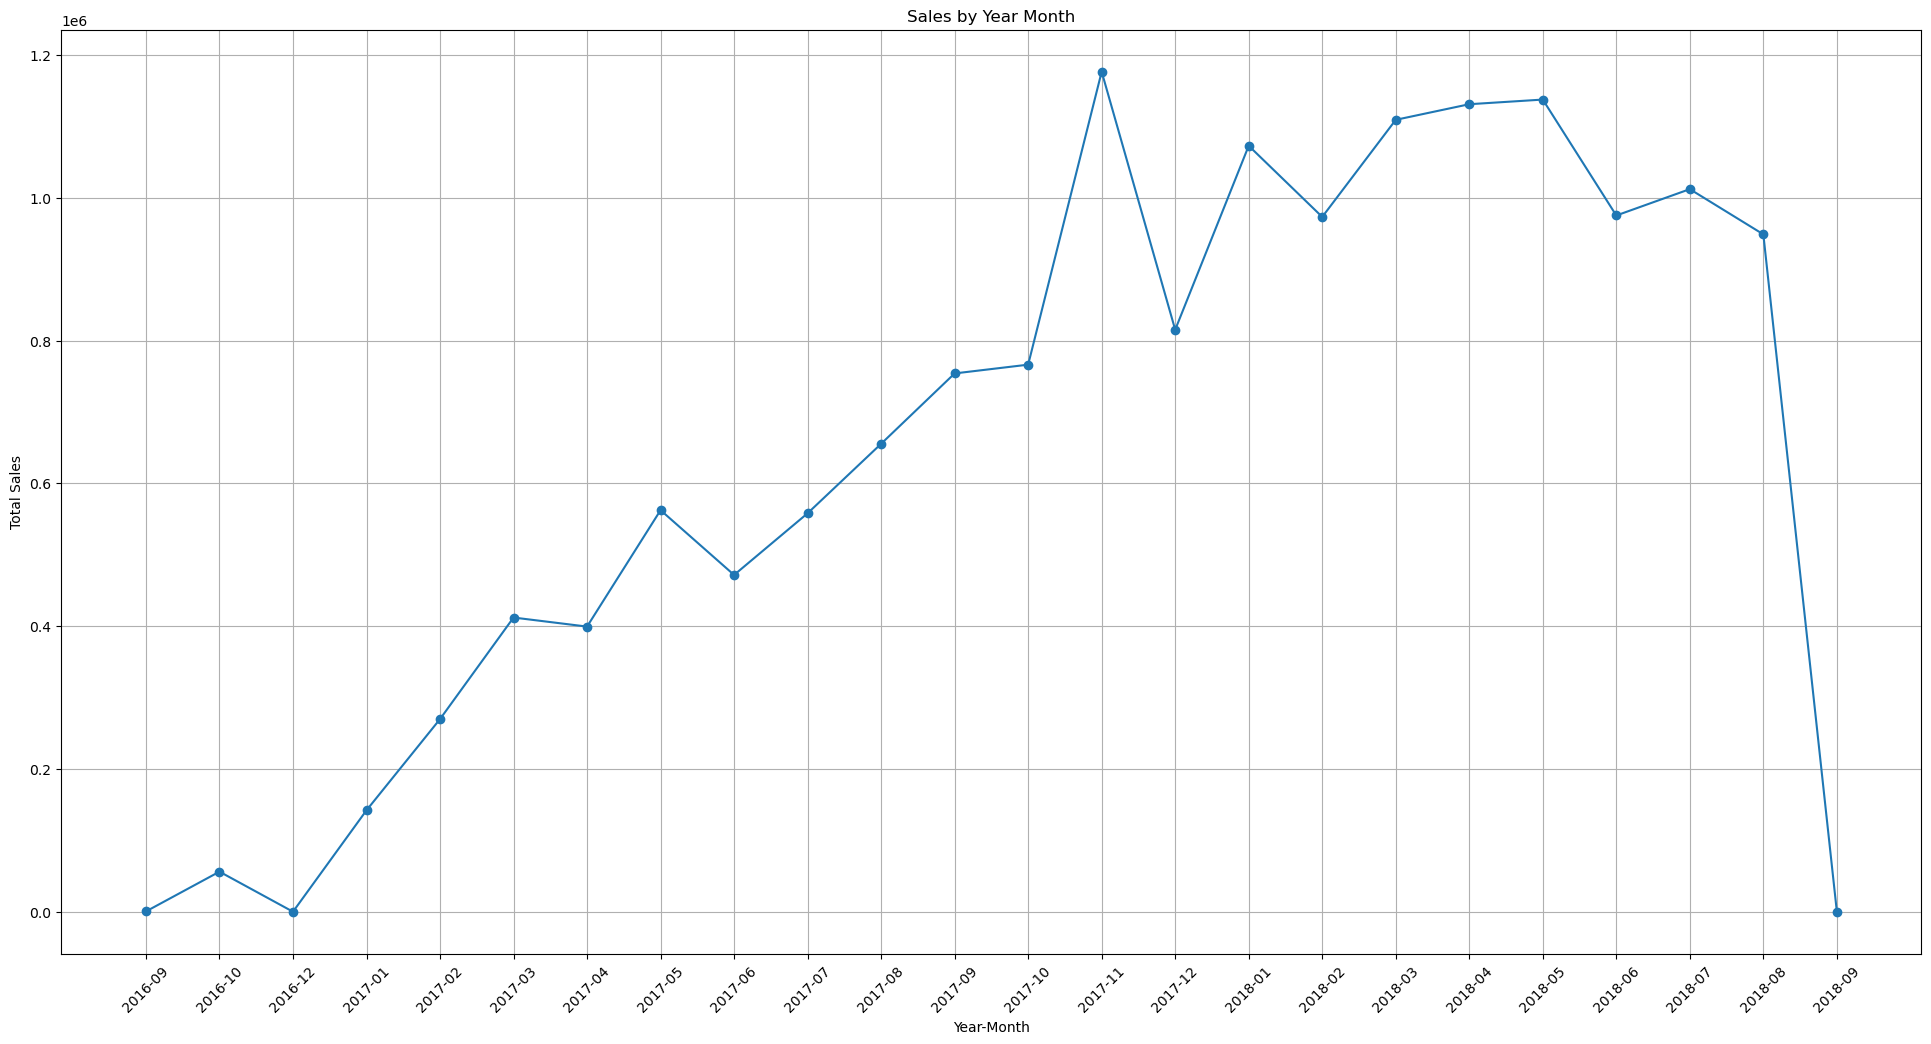

In [123]:
# visualize sales over time - whole dataset period by year month

# group data by date of purchase & set new index - new column names
sales_over_time = order_items.groupby(order_items['Purchase Year-Month'])['total_sales'].sum().reset_index()
sales_over_time.columns = ['Year-Month', 'Total Sales']
sales_over_time['Year-Month'] = sales_over_time['Year-Month'].astype(str)

plt.figure(figsize=(24,12))
plt.plot(sales_over_time['Year-Month'], sales_over_time['Total Sales'], marker='o')
plt.title('Sales by Year Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Potential outliers are clearly visible

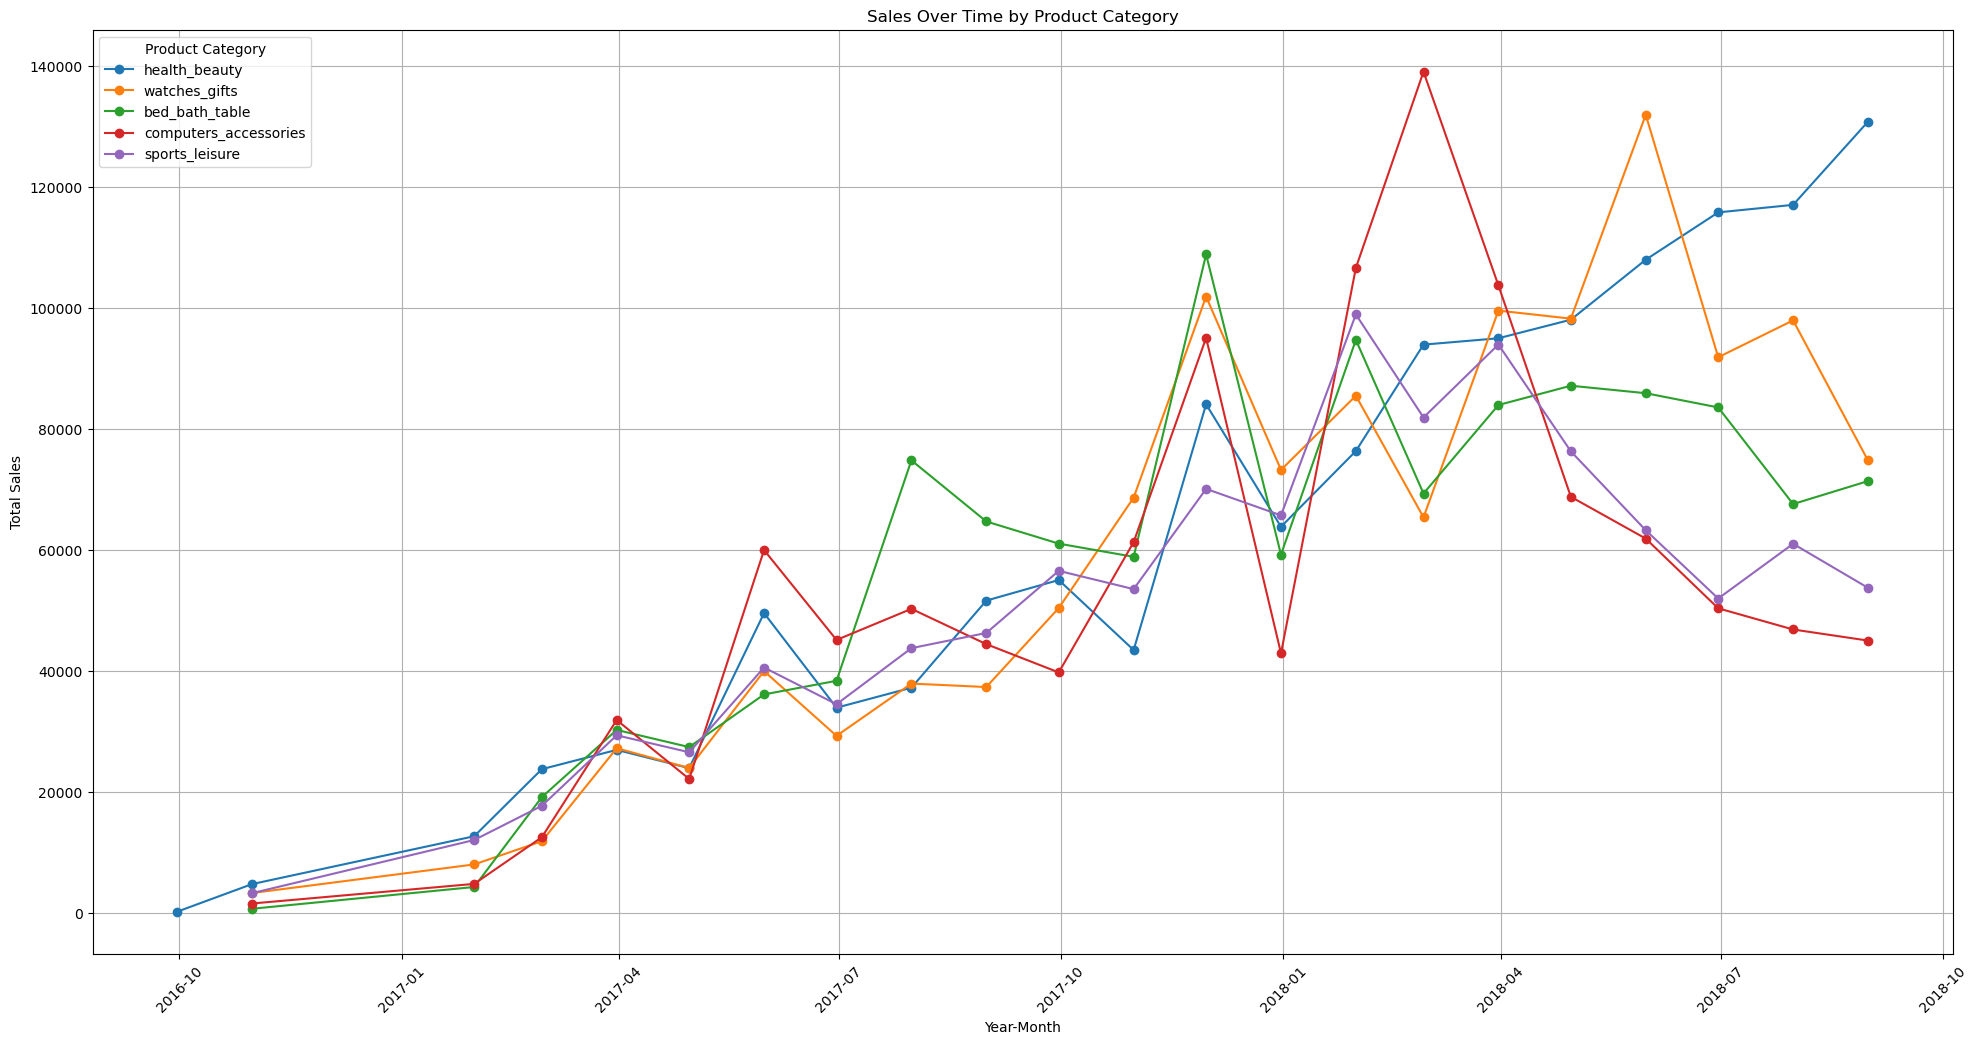

In [124]:
# visualize sales over time by top 5 categories for each year month

# group data by date and product category, then sum the prices
sales_over_time = order_items.groupby([
    pd.Grouper(key='order_purchase_timestamp', freq='ME'), 
    'product_category_name_english'
])['total_sales'].sum().reset_index()
sales_over_time.columns = ['Year-Month', 'Product Category', 'Total Sales'] # rename columns for clarity

# calculate total sales for each product category
total_sales_per_category = sales_over_time.groupby('Product Category')['Total Sales'].sum().reset_index()

# select the top 5 product categories by sales
top_categories = total_sales_per_category.nlargest(5, 'Total Sales')['Product Category']

# filter data to only include the top 5 categories
filtered_sales_over_time = sales_over_time[sales_over_time['Product Category'].isin(top_categories)]

# create the sales over time plot for the top 5 product categories
plt.figure(figsize=(24,12))

for category in top_categories:
    category_data = filtered_sales_over_time[filtered_sales_over_time['Product Category'] == category]
    plt.plot(category_data['Year-Month'], category_data['Total Sales'], marker='o', label=category)

plt.title('Sales Over Time by Product Category')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

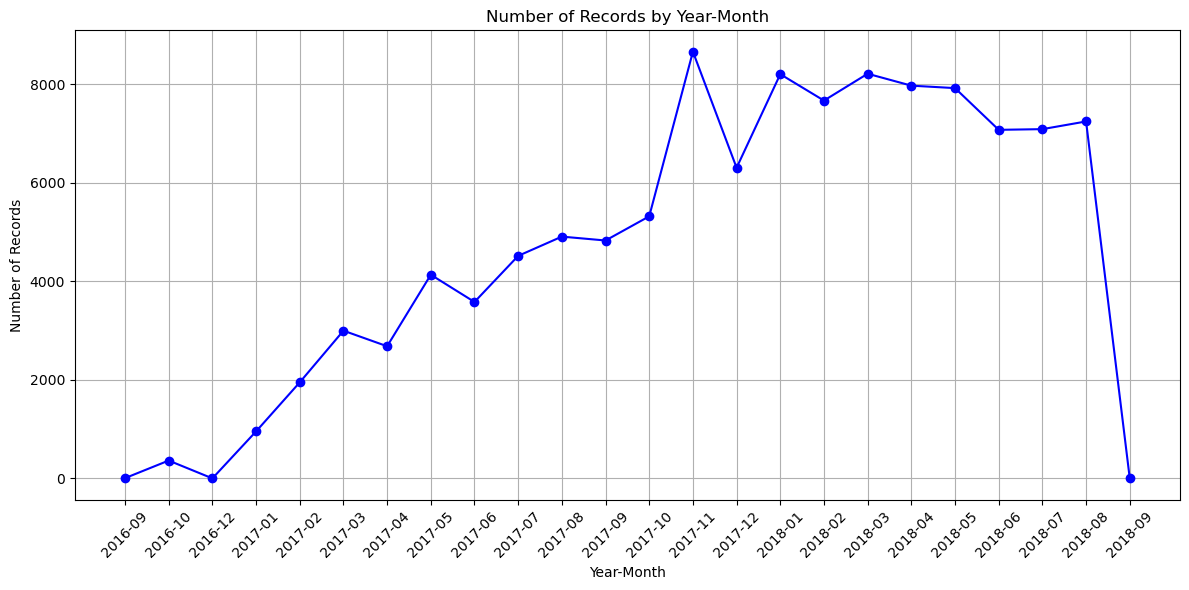

In [125]:
# Lets count the number of records by the date - it is very important as this is a panel data

# Aggregate count of records by month-year
records_by_month_year = order_items.groupby(order_items['order_purchase_timestamp'].dt.to_period('M')).size().reset_index()
records_by_month_year.columns = ['Year-Month', 'Count']
records_by_month_year['Year-Month'] = records_by_month_year['Year-Month'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(records_by_month_year['Year-Month'], records_by_month_year['Count'], marker='o', linestyle='-', color='b')
plt.title('Number of Records by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
# Check records with date higher than 2018-08
order_items[order_items['Purchase Year-Month']>'2018-08']

# As far as I have checked, previous drop of null records and inner join does not affect the maximum date of the data.
# Therefore, we have to forecast the demand since 2018-09-03 + 7 days for 14 days- our forecast period is 2018-09-10 to 2018-09-24

# In the dataset, theres a honeypot within certain orders, e.g. 13bdf405f961a6deec817d817f5c6624, 9c94a4ea2f7876660fa6f1b59b69c8e6, c2bb89b5c1dd978d507284be78a04cb2
# Althrough the shipping_limit_date is set to 2020, the purchases are equal to 2017, therefore this period is correct. 

,order_id,order_item_id,product_id,price,product_category_name_english,order_purchase_timestamp,total_sales,Purchase Date,Purchase Year-Month,Purchase Year,Purchase Month,Purchase Day Name,Purchase Day,Purchase Week of Year
37073,54282e97f61c23b78330c15b154c867d,1,b98992ea80b467987a7fbb88e7f2076a,145.0,kitchen_dining_laundry_garden_furniture,2018-09-03 09:06:57,145.0,2018-09-03,2018-09,2018,9,Monday,3,36
